In [64]:
import pandas as pd
import re 
import nltk
#from nltk.corpus import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.corpus import stopwords
from wordcloud import wordcloud,STOPWORDS
import spacy
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize,sent_tokenize

In [27]:
data=pd.read_csv("D:\\Kaggle dataset\\Corona_NLP_test.csv")
data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


In [28]:
data1=data.iloc[:,4:5]
data1

,OriginalTweet
0,TRENDING: New Yorkers encounter empty supermar...
1,When I couldn't find hand sanitizer at Fred Me...
2,Find out how you can protect yourself and love...
3,#Panic buying hits #NewYork City as anxious sh...
4,#toiletpaper #dunnypaper #coronavirus #coronav...
...,...
3793,Meanwhile In A Supermarket in Israel -- People...
3794,Did you panic buy a lot of non-perishable item...
3795,Asst Prof of Economics @cconces was on @NBCPhi...
3796,Gov need to do somethings instead of biar je r...


In [29]:
y=data.Sentiment
y

0       Extremely Negative
1                 Positive
2       Extremely Positive
3                 Negative
4                  Neutral
               ...        
3793              Positive
3794              Negative
3795               Neutral
3796    Extremely Negative
3797    Extremely Positive
Name: Sentiment, Length: 3798, dtype: object

In [30]:
def remove_punc(text):
    text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
    text = re.sub(r'[^a-zA-z.,!?/:;\"\'\s]'," ",text)
    return text

In [31]:
data1['remove_punct']=data1['OriginalTweet'].apply(remove_punc)
data1

,OriginalTweet,remove_punct
0,TRENDING: New Yorkers encounter empty supermar...,TRENDING New Yorkers encounter empty supermark...
1,When I couldn't find hand sanitizer at Fred Me...,When I couldnt find hand sanitizer at Fred Mey...
2,Find out how you can protect yourself and love...,Find out how you can protect yourself and love...
3,#Panic buying hits #NewYork City as anxious sh...,Panic buying hits NewYork City as anxious shop...
4,#toiletpaper #dunnypaper #coronavirus #coronav...,toiletpaper dunnypaper coronavirus coronavirus...
...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,Meanwhile In A Supermarket in Israel People d...
3794,Did you panic buy a lot of non-perishable item...,Did you panic buy a lot of nonperishable items...
3795,Asst Prof of Economics @cconces was on @NBCPhi...,Asst Prof of Economics cconces was on NBCPhila...
3796,Gov need to do somethings instead of biar je r...,Gov need to do somethings instead of biar je r...


In [32]:
def to_lower(text):
    text=text.lower()
    return text

In [33]:
data1['to_lower']=data1['remove_punct'].apply(to_lower)
data1

,OriginalTweet,remove_punct,to_lower
0,TRENDING: New Yorkers encounter empty supermar...,TRENDING New Yorkers encounter empty supermark...,trending new yorkers encounter empty supermark...
1,When I couldn't find hand sanitizer at Fred Me...,When I couldnt find hand sanitizer at Fred Mey...,when i couldnt find hand sanitizer at fred mey...
2,Find out how you can protect yourself and love...,Find out how you can protect yourself and love...,find out how you can protect yourself and love...
3,#Panic buying hits #NewYork City as anxious sh...,Panic buying hits NewYork City as anxious shop...,panic buying hits newyork city as anxious shop...
4,#toiletpaper #dunnypaper #coronavirus #coronav...,toiletpaper dunnypaper coronavirus coronavirus...,toiletpaper dunnypaper coronavirus coronavirus...
...,...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,Meanwhile In A Supermarket in Israel People d...,meanwhile in a supermarket in israel people d...
3794,Did you panic buy a lot of non-perishable item...,Did you panic buy a lot of nonperishable items...,did you panic buy a lot of nonperishable items...
3795,Asst Prof of Economics @cconces was on @NBCPhi...,Asst Prof of Economics cconces was on NBCPhila...,asst prof of economics cconces was on nbcphila...
3796,Gov need to do somethings instead of biar je r...,Gov need to do somethings instead of biar je r...,gov need to do somethings instead of biar je r...


In [37]:

stop=stopwords.words('english')
   

In [40]:
data1['remove_sw']=data1['to_lower'].apply(lambda x:[word for word in x.split() if not word in stop])
data1

,OriginalTweet,remove_punct,to_lower,remove_sw
0,TRENDING: New Yorkers encounter empty supermar...,TRENDING New Yorkers encounter empty supermark...,trending new yorkers encounter empty supermark...,"[trending, new, yorkers, encounter, empty, sup..."
1,When I couldn't find hand sanitizer at Fred Me...,When I couldnt find hand sanitizer at Fred Mey...,when i couldnt find hand sanitizer at fred mey...,"[couldnt, find, hand, sanitizer, fred, meyer, ..."
2,Find out how you can protect yourself and love...,Find out how you can protect yourself and love...,find out how you can protect yourself and love...,"[find, protect, loved, ones, coronavirus]"
3,#Panic buying hits #NewYork City as anxious sh...,Panic buying hits NewYork City as anxious shop...,panic buying hits newyork city as anxious shop...,"[panic, buying, hits, newyork, city, anxious, ..."
4,#toiletpaper #dunnypaper #coronavirus #coronav...,toiletpaper dunnypaper coronavirus coronavirus...,toiletpaper dunnypaper coronavirus coronavirus...,"[toiletpaper, dunnypaper, coronavirus, coronav..."
...,...,...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,Meanwhile In A Supermarket in Israel People d...,meanwhile in a supermarket in israel people d...,"[meanwhile, supermarket, israel, people, dance..."
3794,Did you panic buy a lot of non-perishable item...,Did you panic buy a lot of nonperishable items...,did you panic buy a lot of nonperishable items...,"[panic, buy, lot, nonperishable, items, echo, ..."
3795,Asst Prof of Economics @cconces was on @NBCPhi...,Asst Prof of Economics cconces was on NBCPhila...,asst prof of economics cconces was on nbcphila...,"[asst, prof, economics, cconces, nbcphiladelph..."
3796,Gov need to do somethings instead of biar je r...,Gov need to do somethings instead of biar je r...,gov need to do somethings instead of biar je r...,"[gov, need, somethings, instead, biar, je, rak..."


In [42]:
def join(text):
    return " ".join([word for word in text])

In [44]:
data1['text']=data1['remove_sw'].apply(join)
data1

,OriginalTweet,remove_punct,to_lower,remove_sw,text
0,TRENDING: New Yorkers encounter empty supermar...,TRENDING New Yorkers encounter empty supermark...,trending new yorkers encounter empty supermark...,"[trending, new, yorkers, encounter, empty, sup...",trending new yorkers encounter empty supermark...
1,When I couldn't find hand sanitizer at Fred Me...,When I couldnt find hand sanitizer at Fred Mey...,when i couldnt find hand sanitizer at fred mey...,"[couldnt, find, hand, sanitizer, fred, meyer, ...",couldnt find hand sanitizer fred meyer turned ...
2,Find out how you can protect yourself and love...,Find out how you can protect yourself and love...,find out how you can protect yourself and love...,"[find, protect, loved, ones, coronavirus]",find protect loved ones coronavirus
3,#Panic buying hits #NewYork City as anxious sh...,Panic buying hits NewYork City as anxious shop...,panic buying hits newyork city as anxious shop...,"[panic, buying, hits, newyork, city, anxious, ...",panic buying hits newyork city anxious shopper...
4,#toiletpaper #dunnypaper #coronavirus #coronav...,toiletpaper dunnypaper coronavirus coronavirus...,toiletpaper dunnypaper coronavirus coronavirus...,"[toiletpaper, dunnypaper, coronavirus, coronav...",toiletpaper dunnypaper coronavirus coronavirus...
...,...,...,...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,Meanwhile In A Supermarket in Israel People d...,meanwhile in a supermarket in israel people d...,"[meanwhile, supermarket, israel, people, dance...",meanwhile supermarket israel people dance sing...
3794,Did you panic buy a lot of non-perishable item...,Did you panic buy a lot of nonperishable items...,did you panic buy a lot of nonperishable items...,"[panic, buy, lot, nonperishable, items, echo, ...",panic buy lot nonperishable items echo needs f...
3795,Asst Prof of Economics @cconces was on @NBCPhi...,Asst Prof of Economics cconces was on NBCPhila...,asst prof of economics cconces was on nbcphila...,"[asst, prof, economics, cconces, nbcphiladelph...",asst prof economics cconces nbcphiladelphia ta...
3796,Gov need to do somethings instead of biar je r...,Gov need to do somethings instead of biar je r...,gov need to do somethings instead of biar je r...,"[gov, need, somethings, instead, biar, je, rak...",gov need somethings instead biar je rakyat ass...


In [45]:
data1['tokens']=data1['text'].apply(word_tokenize)
data1

,OriginalTweet,remove_punct,to_lower,remove_sw,text,tokens
0,TRENDING: New Yorkers encounter empty supermar...,TRENDING New Yorkers encounter empty supermark...,trending new yorkers encounter empty supermark...,"[trending, new, yorkers, encounter, empty, sup...",trending new yorkers encounter empty supermark...,"[trending, new, yorkers, encounter, empty, sup..."
1,When I couldn't find hand sanitizer at Fred Me...,When I couldnt find hand sanitizer at Fred Mey...,when i couldnt find hand sanitizer at fred mey...,"[couldnt, find, hand, sanitizer, fred, meyer, ...",couldnt find hand sanitizer fred meyer turned ...,"[couldnt, find, hand, sanitizer, fred, meyer, ..."
2,Find out how you can protect yourself and love...,Find out how you can protect yourself and love...,find out how you can protect yourself and love...,"[find, protect, loved, ones, coronavirus]",find protect loved ones coronavirus,"[find, protect, loved, ones, coronavirus]"
3,#Panic buying hits #NewYork City as anxious sh...,Panic buying hits NewYork City as anxious shop...,panic buying hits newyork city as anxious shop...,"[panic, buying, hits, newyork, city, anxious, ...",panic buying hits newyork city anxious shopper...,"[panic, buying, hits, newyork, city, anxious, ..."
4,#toiletpaper #dunnypaper #coronavirus #coronav...,toiletpaper dunnypaper coronavirus coronavirus...,toiletpaper dunnypaper coronavirus coronavirus...,"[toiletpaper, dunnypaper, coronavirus, coronav...",toiletpaper dunnypaper coronavirus coronavirus...,"[toiletpaper, dunnypaper, coronavirus, coronav..."
...,...,...,...,...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,Meanwhile In A Supermarket in Israel People d...,meanwhile in a supermarket in israel people d...,"[meanwhile, supermarket, israel, people, dance...",meanwhile supermarket israel people dance sing...,"[meanwhile, supermarket, israel, people, dance..."
3794,Did you panic buy a lot of non-perishable item...,Did you panic buy a lot of nonperishable items...,did you panic buy a lot of nonperishable items...,"[panic, buy, lot, nonperishable, items, echo, ...",panic buy lot nonperishable items echo needs f...,"[panic, buy, lot, nonperishable, items, echo, ..."
3795,Asst Prof of Economics @cconces was on @NBCPhi...,Asst Prof of Economics cconces was on NBCPhila...,asst prof of economics cconces was on nbcphila...,"[asst, prof, economics, cconces, nbcphiladelph...",asst prof economics cconces nbcphiladelphia ta...,"[asst, prof, economics, cconces, nbcphiladelph..."
3796,Gov need to do somethings instead of biar je r...,Gov need to do somethings instead of biar je r...,gov need to do somethings instead of biar je r...,"[gov, need, somethings, instead, biar, je, rak...",gov need somethings instead biar je rakyat ass...,"[gov, need, somethings, instead, biar, je, rak..."


In [46]:
def lemmatize(text):
    ls=WordNetLemmatizer()
    return [ls.lemmatize(word) for word in text]

In [47]:
data1['lemma']=data1['tokens'].apply(lemmatize)
data1

,OriginalTweet,remove_punct,to_lower,remove_sw,text,tokens,lemma
0,TRENDING: New Yorkers encounter empty supermar...,TRENDING New Yorkers encounter empty supermark...,trending new yorkers encounter empty supermark...,"[trending, new, yorkers, encounter, empty, sup...",trending new yorkers encounter empty supermark...,"[trending, new, yorkers, encounter, empty, sup...","[trending, new, yorkers, encounter, empty, sup..."
1,When I couldn't find hand sanitizer at Fred Me...,When I couldnt find hand sanitizer at Fred Mey...,when i couldnt find hand sanitizer at fred mey...,"[couldnt, find, hand, sanitizer, fred, meyer, ...",couldnt find hand sanitizer fred meyer turned ...,"[couldnt, find, hand, sanitizer, fred, meyer, ...","[couldnt, find, hand, sanitizer, fred, meyer, ..."
2,Find out how you can protect yourself and love...,Find out how you can protect yourself and love...,find out how you can protect yourself and love...,"[find, protect, loved, ones, coronavirus]",find protect loved ones coronavirus,"[find, protect, loved, ones, coronavirus]","[find, protect, loved, one, coronavirus]"
3,#Panic buying hits #NewYork City as anxious sh...,Panic buying hits NewYork City as anxious shop...,panic buying hits newyork city as anxious shop...,"[panic, buying, hits, newyork, city, anxious, ...",panic buying hits newyork city anxious shopper...,"[panic, buying, hits, newyork, city, anxious, ...","[panic, buying, hit, newyork, city, anxious, s..."
4,#toiletpaper #dunnypaper #coronavirus #coronav...,toiletpaper dunnypaper coronavirus coronavirus...,toiletpaper dunnypaper coronavirus coronavirus...,"[toiletpaper, dunnypaper, coronavirus, coronav...",toiletpaper dunnypaper coronavirus coronavirus...,"[toiletpaper, dunnypaper, coronavirus, coronav...","[toiletpaper, dunnypaper, coronavirus, coronav..."
...,...,...,...,...,...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,Meanwhile In A Supermarket in Israel People d...,meanwhile in a supermarket in israel people d...,"[meanwhile, supermarket, israel, people, dance...",meanwhile supermarket israel people dance sing...,"[meanwhile, supermarket, israel, people, dance...","[meanwhile, supermarket, israel, people, dance..."
3794,Did you panic buy a lot of non-perishable item...,Did you panic buy a lot of nonperishable items...,did you panic buy a lot of nonperishable items...,"[panic, buy, lot, nonperishable, items, echo, ...",panic buy lot nonperishable items echo needs f...,"[panic, buy, lot, nonperishable, items, echo, ...","[panic, buy, lot, nonperishable, item, echo, n..."
3795,Asst Prof of Economics @cconces was on @NBCPhi...,Asst Prof of Economics cconces was on NBCPhila...,asst prof of economics cconces was on nbcphila...,"[asst, prof, economics, cconces, nbcphiladelph...",asst prof economics cconces nbcphiladelphia ta...,"[asst, prof, economics, cconces, nbcphiladelph...","[asst, prof, economics, cconces, nbcphiladelph..."
3796,Gov need to do somethings instead of biar je r...,Gov need to do somethings instead of biar je r...,gov need to do somethings instead of biar je r...,"[gov, need, somethings, instead, biar, je, rak...",gov need somethings instead biar je rakyat ass...,"[gov, need, somethings, instead, biar, je, rak...","[gov, need, somethings, instead, biar, je, rak..."


In [48]:
# Create sentences to get clean text as input for vectors
def return_sentences(tokens):
    return " ".join([word for word in tokens])

In [49]:
data1['clean_text']=data1['lemma'].apply(return_sentences)
data1

,OriginalTweet,remove_punct,to_lower,remove_sw,text,tokens,lemma,clean_text
0,TRENDING: New Yorkers encounter empty supermar...,TRENDING New Yorkers encounter empty supermark...,trending new yorkers encounter empty supermark...,"[trending, new, yorkers, encounter, empty, sup...",trending new yorkers encounter empty supermark...,"[trending, new, yorkers, encounter, empty, sup...","[trending, new, yorkers, encounter, empty, sup...",trending new yorkers encounter empty supermark...
1,When I couldn't find hand sanitizer at Fred Me...,When I couldnt find hand sanitizer at Fred Mey...,when i couldnt find hand sanitizer at fred mey...,"[couldnt, find, hand, sanitizer, fred, meyer, ...",couldnt find hand sanitizer fred meyer turned ...,"[couldnt, find, hand, sanitizer, fred, meyer, ...","[couldnt, find, hand, sanitizer, fred, meyer, ...",couldnt find hand sanitizer fred meyer turned ...
2,Find out how you can protect yourself and love...,Find out how you can protect yourself and love...,find out how you can protect yourself and love...,"[find, protect, loved, ones, coronavirus]",find protect loved ones coronavirus,"[find, protect, loved, ones, coronavirus]","[find, protect, loved, one, coronavirus]",find protect loved one coronavirus
3,#Panic buying hits #NewYork City as anxious sh...,Panic buying hits NewYork City as anxious shop...,panic buying hits newyork city as anxious shop...,"[panic, buying, hits, newyork, city, anxious, ...",panic buying hits newyork city anxious shopper...,"[panic, buying, hits, newyork, city, anxious, ...","[panic, buying, hit, newyork, city, anxious, s...",panic buying hit newyork city anxious shopper ...
4,#toiletpaper #dunnypaper #coronavirus #coronav...,toiletpaper dunnypaper coronavirus coronavirus...,toiletpaper dunnypaper coronavirus coronavirus...,"[toiletpaper, dunnypaper, coronavirus, coronav...",toiletpaper dunnypaper coronavirus coronavirus...,"[toiletpaper, dunnypaper, coronavirus, coronav...","[toiletpaper, dunnypaper, coronavirus, coronav...",toiletpaper dunnypaper coronavirus coronavirus...
...,...,...,...,...,...,...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,Meanwhile In A Supermarket in Israel People d...,meanwhile in a supermarket in israel people d...,"[meanwhile, supermarket, israel, people, dance...",meanwhile supermarket israel people dance sing...,"[meanwhile, supermarket, israel, people, dance...","[meanwhile, supermarket, israel, people, dance...",meanwhile supermarket israel people dance sing...
3794,Did you panic buy a lot of non-perishable item...,Did you panic buy a lot of nonperishable items...,did you panic buy a lot of nonperishable items...,"[panic, buy, lot, nonperishable, items, echo, ...",panic buy lot nonperishable items echo needs f...,"[panic, buy, lot, nonperishable, items, echo, ...","[panic, buy, lot, nonperishable, item, echo, n...",panic buy lot nonperishable item echo need foo...
3795,Asst Prof of Economics @cconces was on @NBCPhi...,Asst Prof of Economics cconces was on NBCPhila...,asst prof of economics cconces was on nbcphila...,"[asst, prof, economics, cconces, nbcphiladelph...",asst prof economics cconces nbcphiladelphia ta...,"[asst, prof, economics, cconces, nbcphiladelph...","[asst, prof, economics, cconces, nbcphiladelph...",asst prof economics cconces nbcphiladelphia ta...
3796,Gov need to do somethings instead of biar je r...,Gov need to do somethings instead of biar je r...,gov need to do somethings instead of biar je r...,"[gov, need, somethings, instead, biar, je, rak...",gov need somethings instead biar je rakyat ass...,"[gov, need, somethings, instead, biar, je, rak...","[gov, need, somethings, instead, biar, je, rak...",gov need somethings instead biar je rakyat ass...


In [51]:
tf=TfidfVectorizer()
tf_vect=tf.fit_transform(data1['clean_text']).toarray()


In [53]:
X=pd.DataFrame(tf_vect,columns=tf.get_feature_names())
X

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aadya,aamiin,aapl,abajam,abandon,abandoning,abc,abeg,abid,abiding,...,zombieland,zoo,zoom,zoomus,zsl,zsobovny,zsoby,zstupce,zthe,zypisfy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
from sklearn.model_selection import train_test_split

In [72]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)

In [73]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [74]:
classifier.fit(x_train,y_train)
classifier.score(x_train,y_train)

0.5955188679245284

In [75]:
from sklearn import metrics

In [76]:
pred = classifier.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
score

0.2902711323763955

In [65]:
clean_review=' '.join(data1.clean_text)
clean_review

'trending new yorkers encounter empty supermarket shelf pictured wegmans brooklyn soldout online grocer foodkick maxdelivery coronavirusfearing shopper stock couldnt find hand sanitizer fred meyer turned amazon pack purellcheck coronavirus concern driving price find protect loved one coronavirus panic buying hit newyork city anxious shopper stock foodampmedical supply healthcare worker becomes bigapple st confirmed coronavirus patient bloomberg staged eventqanon qanon qanon election cdc toiletpaper dunnypaper coronavirus coronavirusaustralia coronavirusupdate covid news corvid newsmelb dunnypapergate costco one week everyone buying baby milk powder next everyone buying toilet paper remember last time paid gallon regular gas los angelesprices pump going look coronavirus impacting price pm abc voting age coronavirus hand sanitizer supertuesday drtedros cant stop covid without protecting healthworkersprices surgical mask increased sixfold n respirator trebled amp gown cost twice muchdrted

In [69]:
from wordcloud import WordCloud

In [67]:
def plot_cloud(workcloud):
    plt.figure(figsize=(30,40))
    plt.imshow(workcloud)
    plt.axis('off')

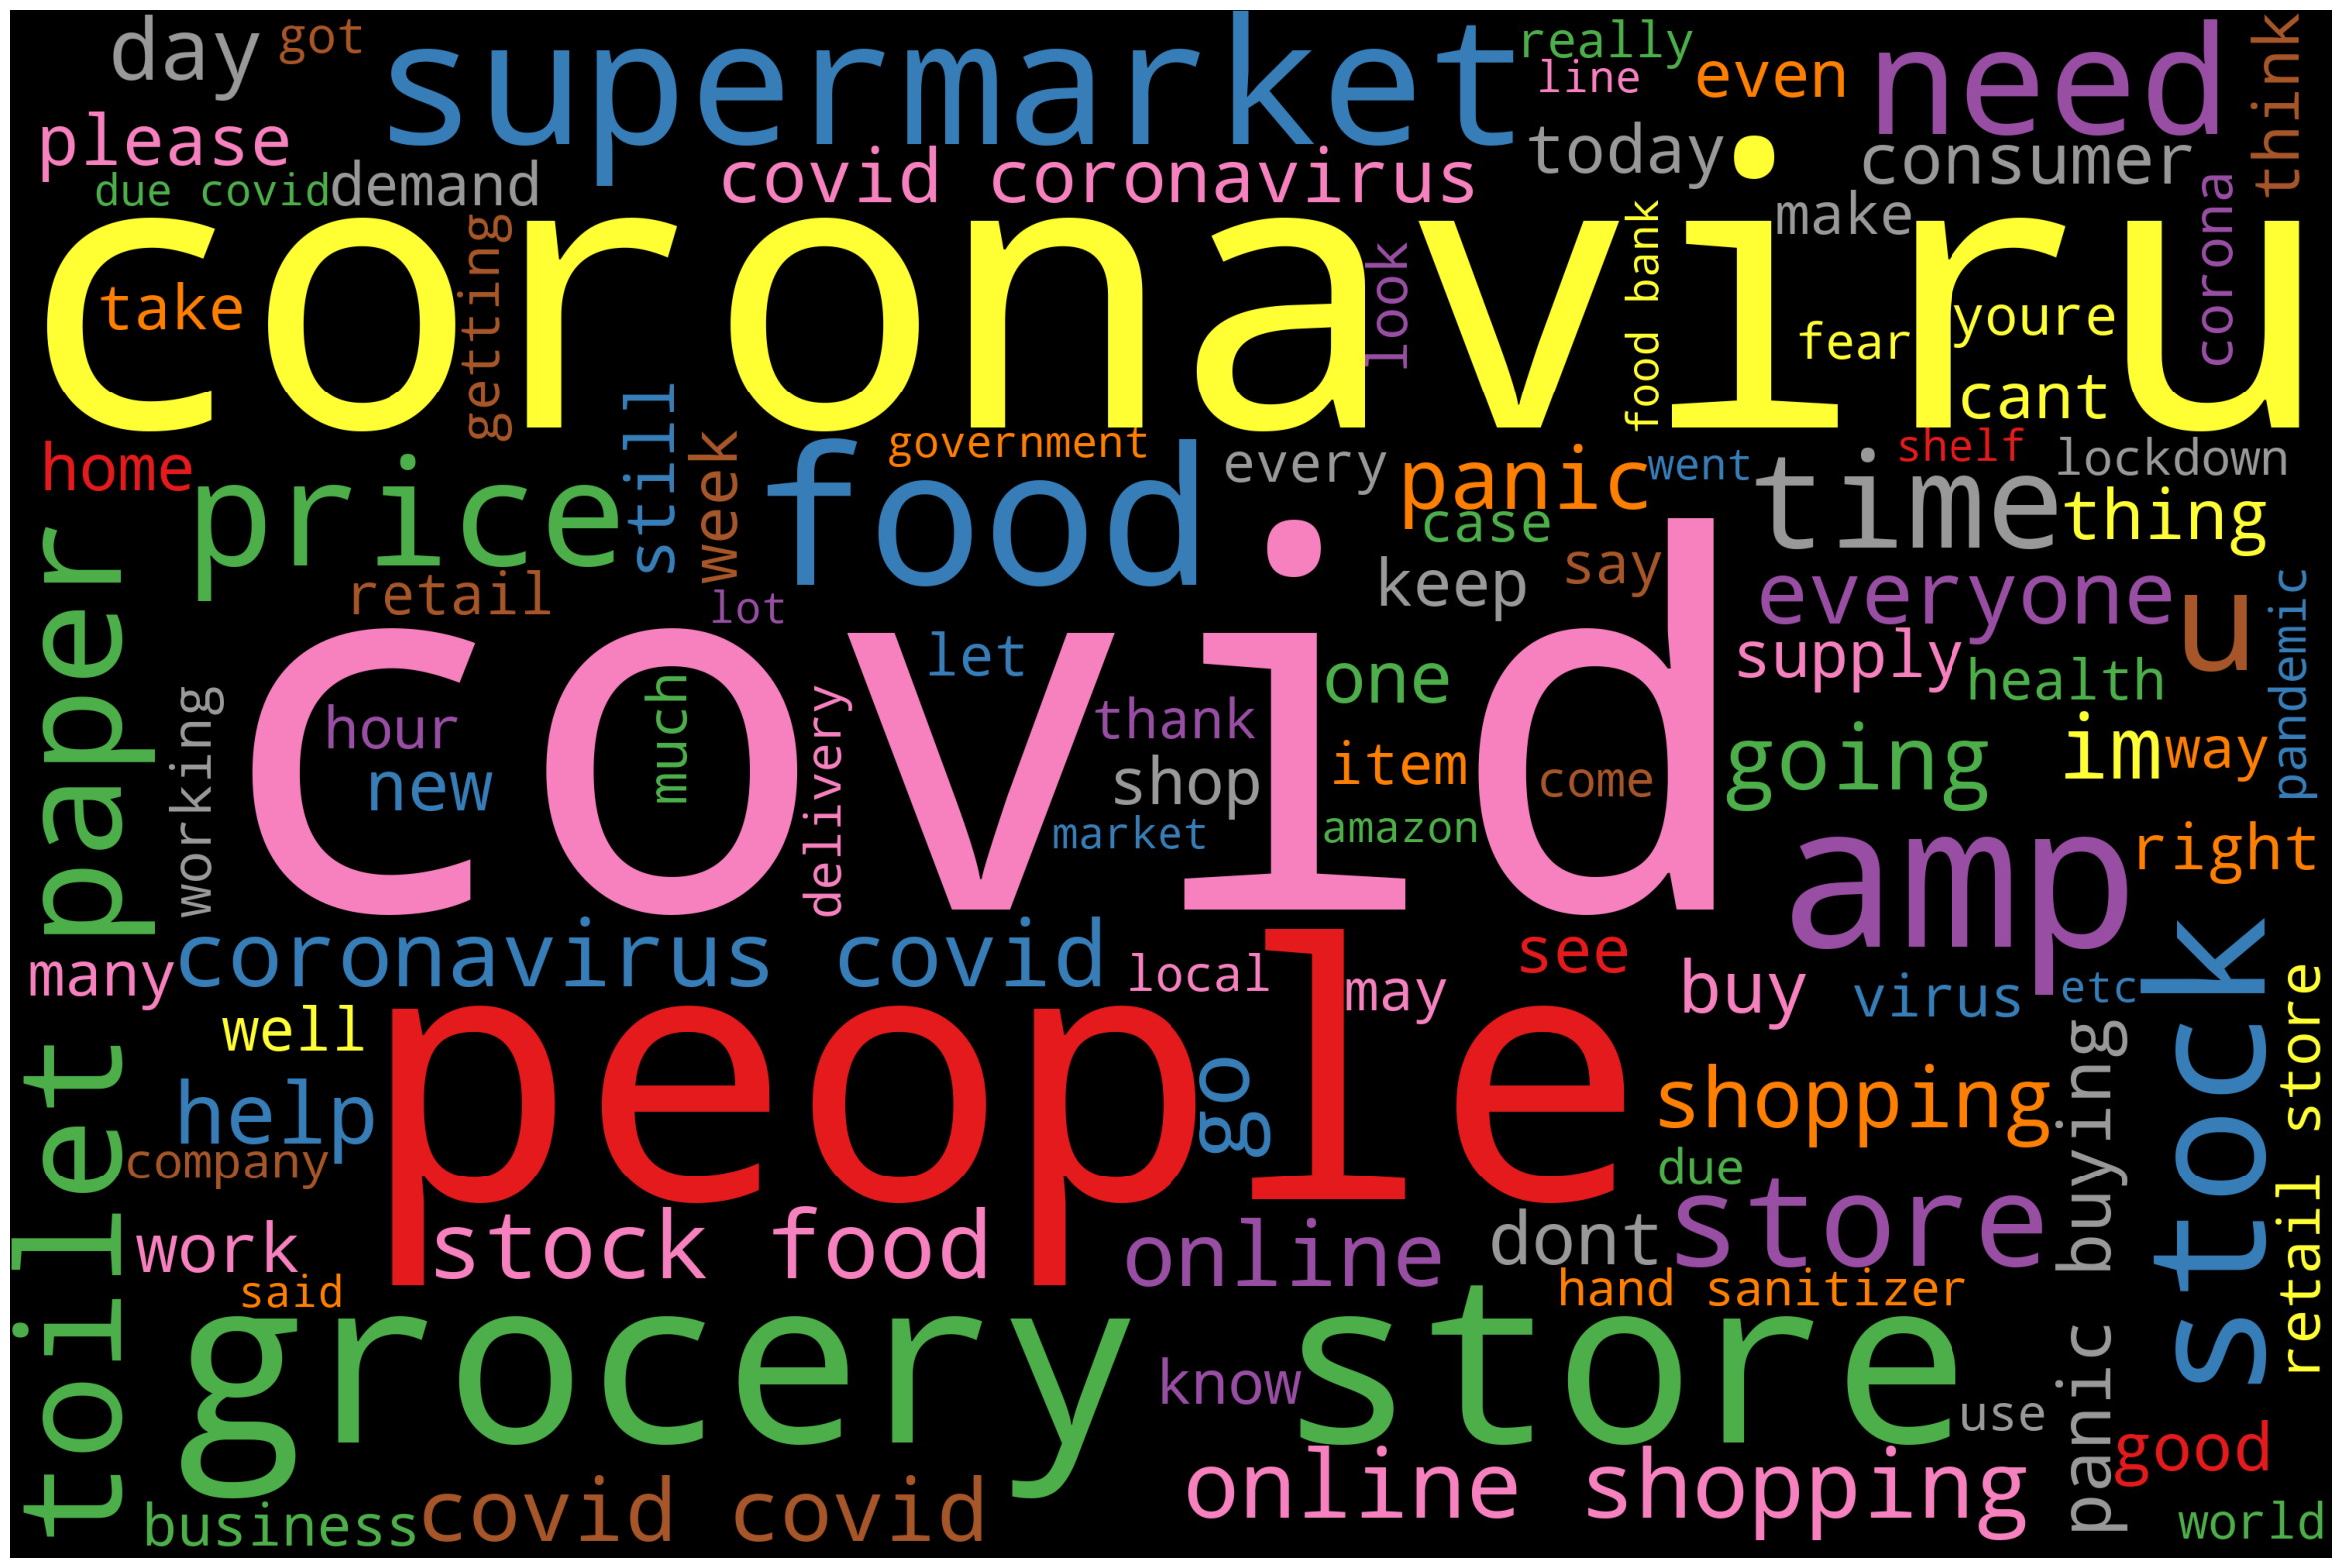

In [70]:
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=100,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_review)
plot_cloud(wordcloud)

In [71]:
nlp = spacy.load("en_core_web_md")
one_block = clean_review
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [79]:
X.head(20)

,aadya,aamiin,aapl,abajam,abandon,abandoning,abc,abeg,abid,abiding,...,zombieland,zoo,zoom,zoomus,zsl,zsobovny,zsoby,zstupce,zthe,zypisfy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.309204,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
